🩺 Predict if a female patient has diabetes (1) or not (0), based on features like glucose, insulin, BMI, etc.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


df = pd.read_csv(url, names=columns)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



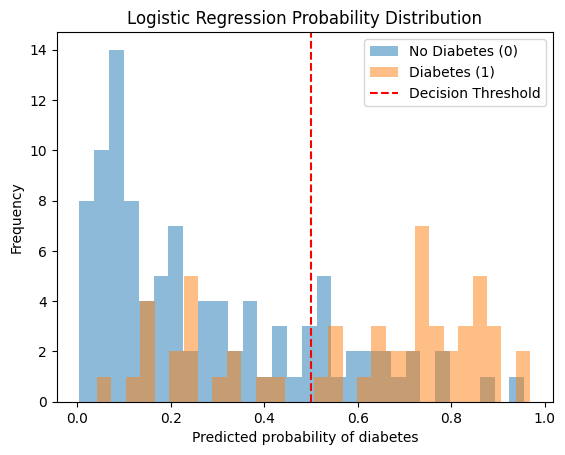

In [6]:
import matplotlib.pyplot as plt
import numpy as np

y_probs = model.predict_proba(X_test_scaled)[:, 1]

plt.hist(y_probs[y_test == 0], bins=30, alpha=0.5, label='No Diabetes (0)')
plt.hist(y_probs[y_test == 1], bins=30, alpha=0.5, label='Diabetes (1)')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold')
plt.legend()
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")
plt.title("Logistic Regression Probability Distribution")
plt.show()

In [7]:
for col, coef in zip(X.columns, model.coef_[0]):
    print(f"{col}: {coef:.3f}")


Pregnancies: 0.213
Glucose: 1.071
BloodPressure: -0.248
SkinThickness: 0.046
Insulin: -0.201
BMI: 0.778
DiabetesPedigreeFunction: 0.231
Age: 0.421


HR Analytics: Employee Attrition & Performance using IBM dataset

In [2]:
import pandas as pd

df = pd.read_csv('datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

df = pd.get_dummies(df, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



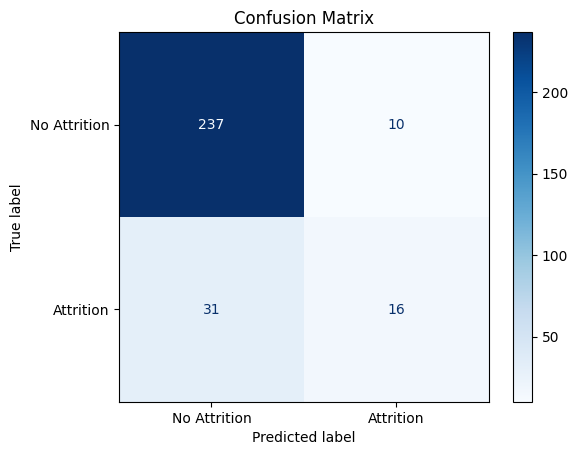

In [14]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

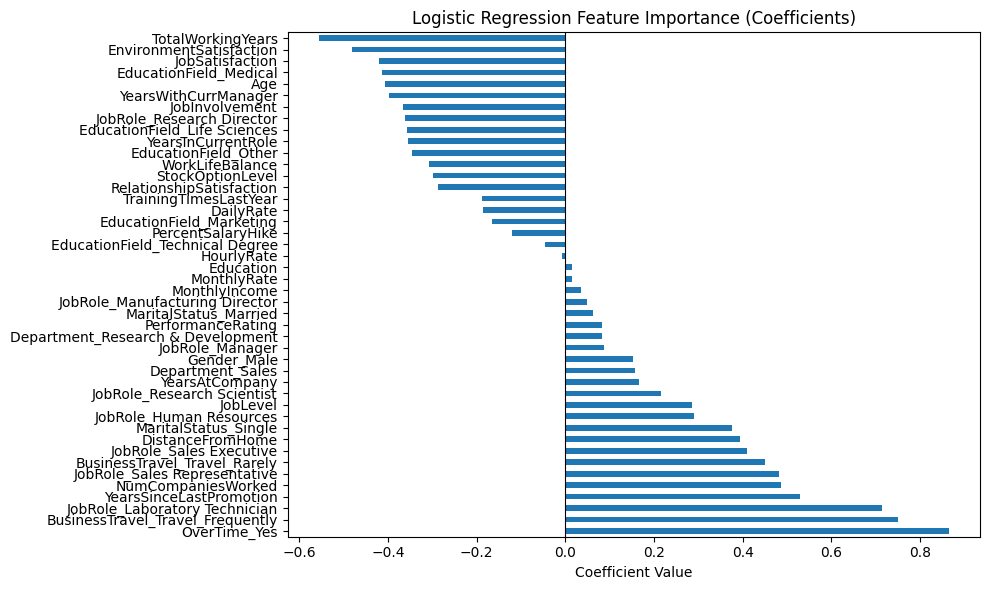

In [15]:
import numpy as np

coefs = pd.Series(clf.coef_[0], index=X.columns)
top_features = coefs.sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Logistic Regression Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

<h2>🧠 Key Insights from Logistic Regression Coefficients</h2>

<h3>🔵 Features That Decrease Attrition (Negative Coefficients)</h3>

These factors lower the probability of an employee quitting:

    Total Working Years (-0.6)

        Experienced employees are less likely to leave.

        Recommendation: Retain senior talent by creating mentorship roles or recognizing tenure.

    Environment Satisfaction, Job Satisfaction, Job Involvement (≈ -0.3 to -0.4)

        Employees satisfied with their work conditions and job role show much lower attrition.

        Recommendation: Regular anonymous surveys + fast HR response to improve satisfaction and involvement.

    Age, Years with Current Manager, Years in Current Role

        Stability in position and age correlate with reduced turnover.

        Recommendation: Reduce excessive role-switching, and invest in good manager-employee relationships.

    EducationField_Medical, Life Sciences

        Employees with these backgrounds seem more stable in this context.

        Recommendation: Consider skill-aligned placements and development for other education fields.

<h3>🔴 Features That Increase Attrition (Positive Coefficients)</h3>

These increase the likelihood of employees quitting:

    OverTime_Yes (+0.85) → Strongest predictor of attrition

        Overtime work highly correlates with leaving the company.

        Recommendation: Limit overtime. Introduce flexible hours or shift rotations to reduce burnout.

    Business Travel_Frequently (+0.65)

        Frequent travel is exhausting and may drive employees to resign.

        Recommendation: Reduce unnecessary travel; offer remote meeting alternatives or travel compensation.

    Job Role: Sales Representative, Laboratory Technician, Sales Executive

        These roles show higher attrition.

        Recommendation: Investigate job stress, compensation satisfaction, and career growth in these roles.

    Years Since Last Promotion

        Employees who haven't been promoted in a long time are more likely to leave.

        Recommendation: Establish clear, fair promotion paths. Use regular performance-based evaluations.

    Distance From Home

        Long commute times might contribute to attrition.

        Recommendation: Offer hybrid work or relocation support.

<h3>✅ Strategic Recommendations</h3>

<b>🧩 Organizational-Level Changes</b>

    Develop a retention strategy based on employee segments most at risk: e.g., frequent travelers, overtime workers, and sales roles.

    Audit managerial practices: Long tenure with current manager seems beneficial, invest in leadership training.

<b>🛠 HR & Policy Changes</b>

    Reevaluate workloads and overtime policy to prevent burnout.

    Launch internal mobility programs to help stagnant employees switch to new roles.

    Reward long tenure, whether through compensation, recognition, or development paths.